## Extracción y Analisis de los Datos


In [37]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.2-cp39-cp39-macosx_10_9_x86_64.whl (12.1 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl (39.4 MB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#IMPORTAR CONJUNTO DE LIBRERÍAS
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

# #Análisis estadísticos
# #!pip install empiricaldist
# import empiricaldist
# import scipy
# import statsmodels.api as sm
 
 
# #Librerías de ML
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.tree import DecisionTreeClassifier

# import sklearn.compose
# import sklearn.impute
# import sklearn.preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.kernel_approximation import Nystroem
# from sklearn.linear_model import BayesianRidge, Ridge
# from sklearn.neighbors import KNeighborsRegressor

# #Advertencias
# import warnings
# warnings.filterwarnings('ignore')

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [4]:
df = pd.read_csv('salaries.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [7]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [8]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [9]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Grafica de ubicaciones


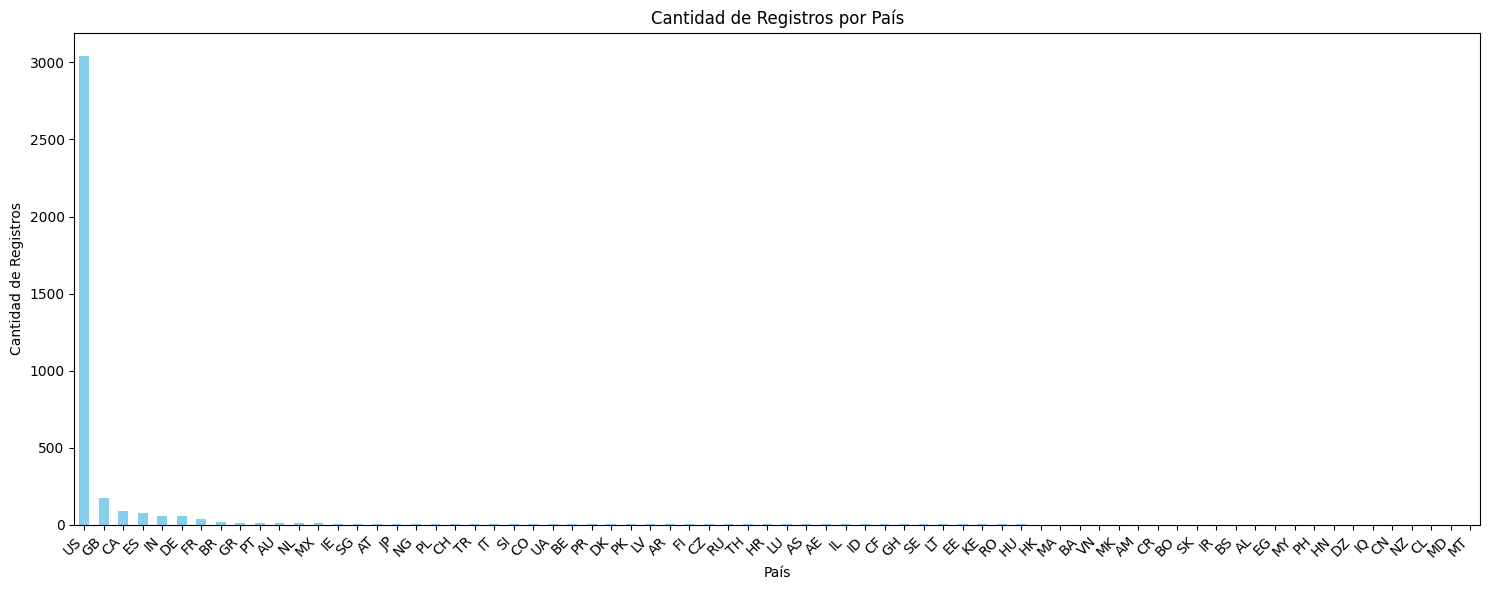

In [39]:
country_counts = df['company_location'].value_counts()


plt.figure(figsize=(15,6)) 
country_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Registros por Ubicación de la Compañía')
plt.xlabel('País')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

### Grafica de tipos de contratos


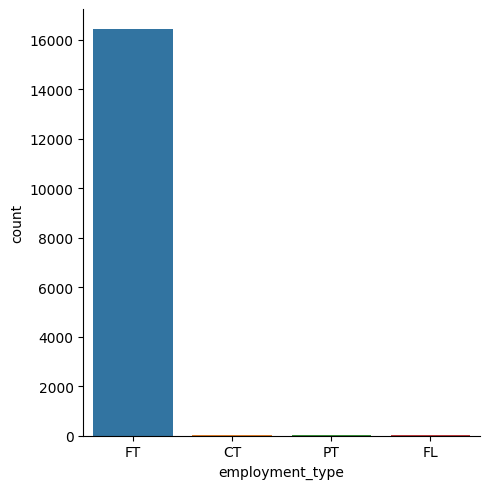

In [119]:
sb.catplot(data = df, x = 'employment_type', kind = 'count', palette = "tab10")  
plt.show()

### Cantidad de ofertas por año


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_9455/1274460414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df, x = 'work_year', kind='count',palette = "tab10")


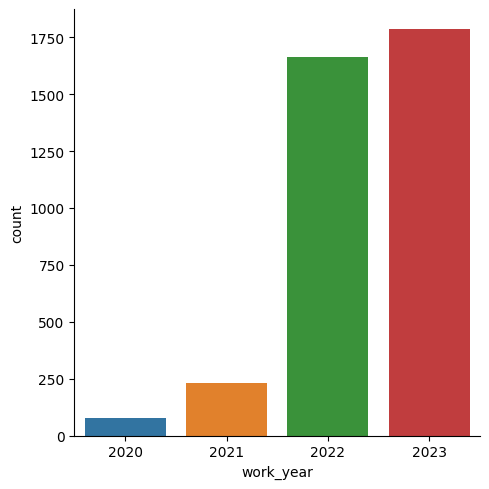

In [21]:
sb.catplot(data = df, x = 'work_year', kind='count',palette = "tab10")
plt.show()

### Filtros


De acuerdo a las gráficas realizadas en la sección anterior, decidimos filtrar el dataset para incluir unicamente los registros de empleo tiempo completo (FT) y aquellos que pertenezcan a los 5 paises con más registros. Además, se utilizan unicamente los annos 2022 y 2023 ya que incluyen la mayor cantidad de registros


In [87]:
# 1
# Filtrar los registros que pertenzcan a tiempo completo, a los paises con mas registros y en los años seleccionados
employment_type = 'FT' 
work_years = [2022, 2023]
company_locations = country_counts.head(5).index
mascara1 = (df['employment_type'] == employment_type) & (df['company_location'].isin(company_locations) & (df['work_year'].isin(work_years)))
df_proc_filtrado = df[mascara1]
df_proc_filtrado

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
3472,2022,MI,FT,Data Scientist,48000,USD,48000,RU,100,US,S
3482,2022,SE,FT,Research Scientist,144000,USD,144000,US,50,US,L
3486,2022,EN,FT,Financial Data Analyst,100000,USD,100000,US,50,US,L
3490,2022,EN,FT,Data Engineer,120000,USD,120000,US,100,US,M


In [15]:
df_proc_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3412 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3412 non-null   int64 
 1   experience_level    3412 non-null   object
 2   employment_type     3412 non-null   object
 3   job_title           3412 non-null   object
 4   salary              3412 non-null   int64 
 5   salary_currency     3412 non-null   object
 6   salary_in_usd       3412 non-null   int64 
 7   employee_residence  3412 non-null   object
 8   remote_ratio        3412 non-null   int64 
 9   company_location    3412 non-null   object
 10  company_size        3412 non-null   object
dtypes: int64(4), object(7)
memory usage: 319.9+ KB


In [16]:
df_proc_filtrado.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3412.000000,3412,3412,3412,3.412000e+03,3412,3412.000000,3412,3412.000000,3412,3412
unique,NaN,4,1,81,NaN,6,NaN,28,NaN,5,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2419,3412,994,NaN,3098,NaN,2992,NaN,3022,3007
mean,2022.433470,NaN,NaN,NaN,1.784474e+05,NaN,144355.761430,NaN,44.621923,NaN,NaN
std,0.636958,NaN,NaN,NaN,3.658609e+05,NaN,59755.655786,NaN,49.041867,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.500000e+04,NaN,5409.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.060000e+05,NaN,105000.000000,NaN,0.000000,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,1.415250e+05,NaN,140000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.840000e+05,NaN,180000.000000,NaN,100.000000,NaN,NaN


### Correlación entre variables


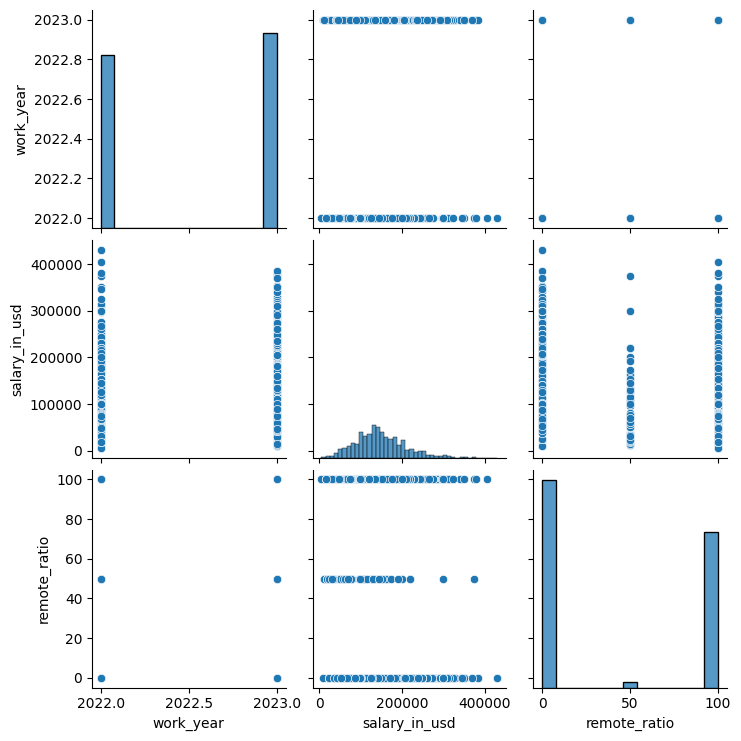

In [33]:
sb.pairplot(df_proc_filtrado)
plt.show()

### Distribución del Nivel de Experiencia


<Axes: ylabel='count'>

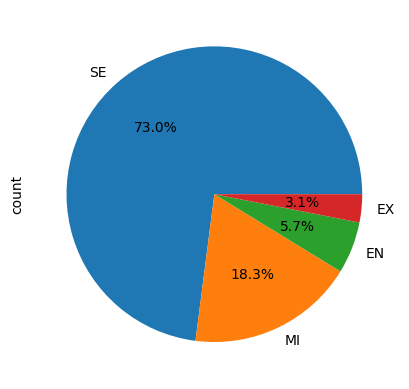

In [35]:
df_proc_filtrado['experience_level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Salario en dolares por nivel de experiencia


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_9455/2941909499.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df_proc_filtrado, x = 'experience_level', y = 'salary_in_usd',palette = "tab10", kind='box')


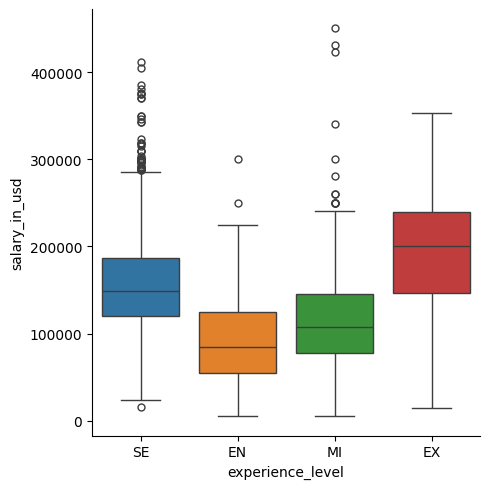

In [17]:
sb.catplot(data = df_proc_filtrado, x = 'experience_level', y = 'salary_in_usd',palette = "tab10", kind='box')
plt.show()

### Cantidad de trabajos por nivel de experiencia


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_9455/3781652166.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df_proc_filtrado, x = 'experience_level', kind = 'count', palette = "tab10")


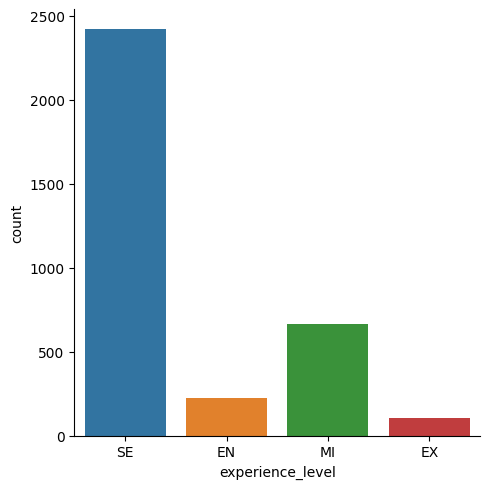

In [18]:
sb.catplot(data = df_proc_filtrado, x = 'experience_level', kind = 'count', palette = "tab10")
plt.show()

### Cantidad de trabajos por tamaño de la compañia


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_9455/4115360741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = df_proc_filtrado, x = 'company_size', kind = 'count', palette = "tab10")  #Esta columna se puede eliminar


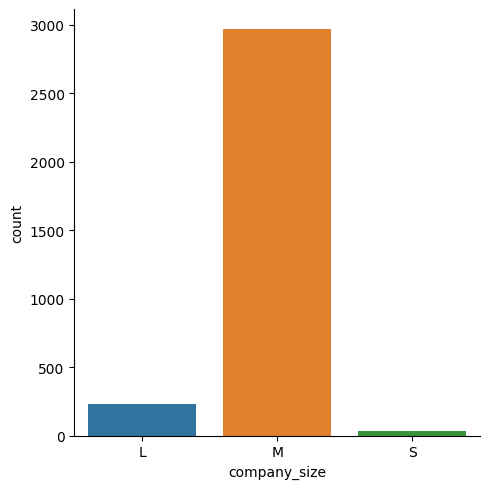

In [25]:
sb.catplot(data = df_proc_filtrado, x = 'company_size', kind = 'count', palette = "tab10")  #Esta columna se puede eliminar
plt.show()

### Salario dependiendo de la modalidad


In [88]:
# 2
df_proc_filtrado.loc[:, 'remote_ratio'] = df_proc_filtrado['remote_ratio'].replace({0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'})

/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_9455/3011959912.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Remoto' 'Remoto' 'Remoto' ... 'Hibrido' 'Remoto' 'Presencial']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_proc_filtrado.loc[:, 'remote_ratio'] = df_proc_filtrado['remote_ratio'].replace({0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'})


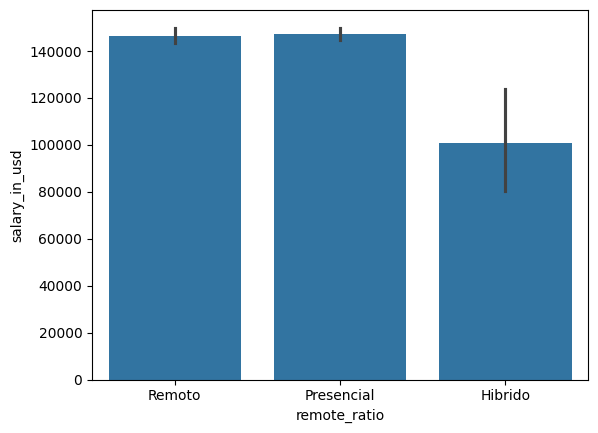

In [59]:
sb.barplot(y='salary_in_usd', x='remote_ratio', data=df_proc_filtrado)
plt.show()

### Transformación de datos


Se elimina la columna 'employment_type' ya que se esta filtrando por trabajos de tiempo completo, y se eliminan las columnas 'salary_currency' y 'salary' ya que se utiliza el valor del salario en dolares


In [89]:
# 3
df_proc_filtrado = df_proc_filtrado.drop(['employment_type','salary_currency','salary'], axis=1)
df_proc_filtrado

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,Principal Data Scientist,85847,ES,Remoto,ES,L
3,2023,SE,Data Scientist,175000,CA,Remoto,CA,M
4,2023,SE,Data Scientist,120000,CA,Remoto,CA,M
5,2023,SE,Applied Scientist,222200,US,Presencial,US,L
6,2023,SE,Applied Scientist,136000,US,Presencial,US,L
...,...,...,...,...,...,...,...,...
3472,2022,MI,Data Scientist,48000,RU,Remoto,US,S
3482,2022,SE,Research Scientist,144000,US,Hibrido,US,L
3486,2022,EN,Financial Data Analyst,100000,US,Hibrido,US,L
3490,2022,EN,Data Engineer,120000,US,Remoto,US,M


### Codificación de Datos


In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [90]:
encoder = LabelEncoder()
df_proc_filtrado['job_title'] = encoder.fit_transform(df_proc_filtrado['job_title'])
job_title_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [91]:
from sklearn.preprocessing import OneHotEncoder

# Crear el codificador OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False para obtener un array denso

# Ajustar el codificador a las columnas categóricas y transformar los datos
encoded_array = encoder.fit_transform(df_proc_filtrado[['experience_level', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']])

# Convertir el array transformado a un DataFrame con nombres de columnas descriptivos
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['experience_level', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']))

# Resetear el índice del DataFrame codificado para alinearlo con el original
encoded_df.index = df_proc_filtrado.index

# Añadir las columnas codificadas al DataFrame original
df_proc_filtrado = pd.concat([df_proc_filtrado, encoded_df], axis=1)

# Eliminar las columnas originales
df_proc_filtrado.drop(['experience_level', 'employee_residence', 'company_location', 'company_size', 'remote_ratio'], axis=1, inplace=True)

In [92]:
df_proc_filtrado

,work_year,job_title,salary_in_usd,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employee_residence_AR,employee_residence_BO,employee_residence_BR,...,company_location_ES,company_location_GB,company_location_IN,company_location_US,company_size_L,company_size_M,company_size_S,remote_ratio_Hibrido,remote_ratio_Presencial,remote_ratio_Remoto
0,2023,70,85847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2023,38,175000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2023,38,120000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,2023,6,222200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,2023,6,136000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2022,38,48000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3482,2022,74,144000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3486,2022,46,100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3490,2022,25,120000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Modelos


### Standard Scaler


In [105]:
X = df_proc_filtrado.drop('salary_in_usd', axis=1)
y = df_proc_filtrado['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresión Lineal


In [106]:
#Importo el modelo
linear_regression = LinearRegression()

#Entreno el modelo utilizando los parámetros de entrenamiento
linear_regression.fit(X_train, y_train)

#Predigo sobre los datos de prueba
y_pred = linear_regression.predict(X_test)

#Me interesa también revisar la predicción del entrenamiento
y_predt = linear_regression.predict(X_train)
print('Linear Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Linear Regression R2 Score:', r2_score(y_test, y_pred))

Linear Regression MAE: 37853.86188246829
Linear Regression RMSE: 47993.737538729234
Linear Regression R2 Score: 0.2522952158868037


### KNN


In [107]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)
print('KNN MAE:', mean_absolute_error(y_test, knn_model.predict(X_test)))
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test))))
print('KNN R2 Score:', r2_score(y_test, knn_model.predict(X_test)))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score: 0.24935705093904517
KNN MAE: 37403.98639104221
KNN RMSE: 47290.113287633205
KNN R2 Score: 0.2740583337982182


### Árbol de Decisión


In [108]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

tree_model = grid_search.best_estimator_
tree_model.fit(X_train, y_train)
print('Decision Tree MAE:', mean_absolute_error(y_test, tree_model.predict(X_test)))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, tree_model.predict(X_test))))
print('Decision Tree R2 Score:', r2_score(y_test, tree_model.predict(X_test)))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.2668082489719006
Decision Tree MAE: 35813.513749821934
Decision Tree RMSE: 46293.900418469406
Decision Tree R2 Score: 0.3043215325746659


### Random Forest


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_random_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_random_forest.fit(X_train, y_train)
print('Best Parameters:', grid_search_random_forest.best_params_)
print('Best Score:', grid_search_random_forest.best_score_)

random_forest_model = grid_search_random_forest.best_estimator_
random_forest_model.fit(X_train, y_train)
print('Random Forest MAE:', mean_absolute_error(y_test, random_forest_model.predict(X_test)))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, random_forest_model.predict(X_test))))
print('Random Forest R2 Score:', r2_score(y_test, random_forest_model.predict(X_test)))

### Ada Boost


In [ ]:
param_grid = {
    'n_estimators': [100,200,300]
}

grid_search = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

ada_boost_model = grid_search.best_estimator_
ada_boost_model.fit(X_train, y_train)
print('Ada Boost MAE:', mean_absolute_error(y_test, ada_boost_model.predict(X_test)))
print('Ada Boost RMSE:', np.sqrt(mean_squared_error(y_test, ada_boost_model.predict(X_test))))
print('Ada Boost R2 Score:', r2_score(y_test, ada_boost_model.predict(X_test)))

### Gradient Boosting


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

gradient_boosting_model = grid_search.best_estimator_
gradient_boosting_model.fit(X_train, y_train)
print('Gradient Boosting MAE:', mean_absolute_error(y_test, gradient_boosting_model.predict(X_test)))
print('Gradient Boosting RMSE:', np.sqrt(mean_squared_error(y_test, gradient_boosting_model.predict(X_test))))
print('Gradient Boosting R2 Score:', r2_score(y_test, gradient_boosting_model.predict(X_test)))